 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [150]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [151]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [152]:
# Count nulls
#csv_data.isnull().sum()
whale_returns_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [153]:
# Drop nulls
# csv_data = csv_data.dropna().copy()
#whale_returns_df.isnull().sum()
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.head()
#whale_returns_df.dtypes

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [154]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path)

In [155]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [156]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
#algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()
#algo_returns_df.isnull().sum()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [157]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_path)


In [158]:
# Check Data Types
sp500_history_df.dtypes
sp500_history_df.head()
sp500_history_df.columns

Index(['Date', 'Close'], dtype='object')

In [159]:
# Fix Data Types
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df = sp500_history_df.sort_index()

#Remove "$" from Close price
sp500_history_df["Close"] = sp500_history_df["Close"].astype('string')
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].astype('float')

#sp500_history_df["Close"].head()
#sp500_history_df["Close"].dtype



c:\Users\P630461\Anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [160]:
#Calculate Daily Returns and rename columns
sp500_dailyreturn_df = sp500_history_df.pct_change()
sp500_dailyreturn_df.head()

# sp500_dailyreturn_df.set_index(pd.to_datetime(sp500_dailyreturn_df['Date'], infer_datetime_format=True), inplace=True)
# sp500_dailyreturn_df.drop(columns=['Date'], inplace=True)
# sp500_dailyreturn_df = sp500_dailyreturn_df.sort_index()
#sp500_dailyreturn_df.columns


sp500_dailyreturn_df.columns = ["SP500"]

#sp500_history_df.head()
sp500_dailyreturn_df.head()

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [161]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whale_returns_df, algo_returns_df, sp500_dailyreturn_df], axis="columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:xlabel='Date'>

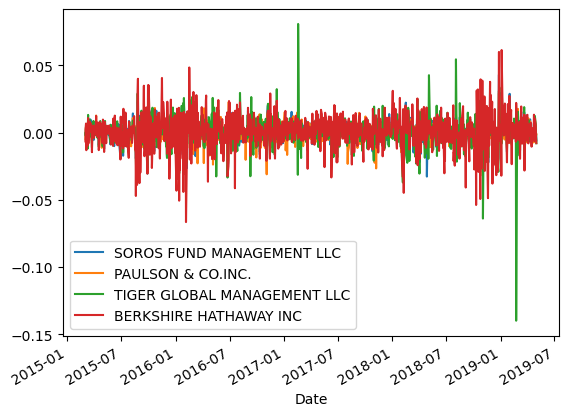

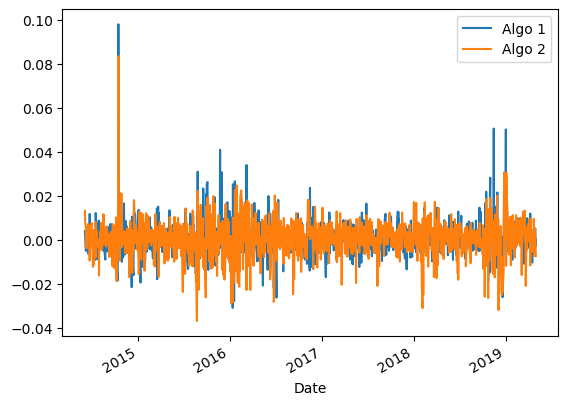

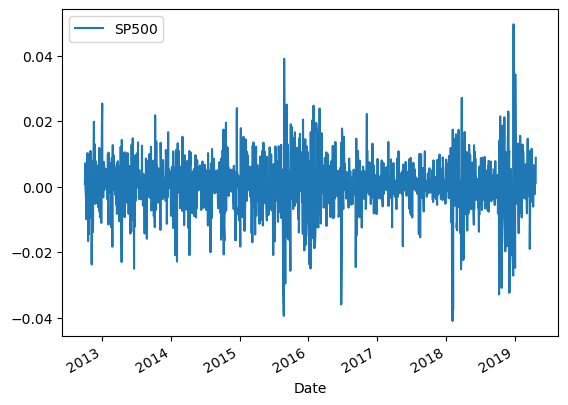

In [162]:
# Plot daily returns of all portfolios
whale_returns_df.plot()
algo_returns_df.plot()
sp500_dailyreturn_df.plot()

<AxesSubplot:xlabel='Date'>

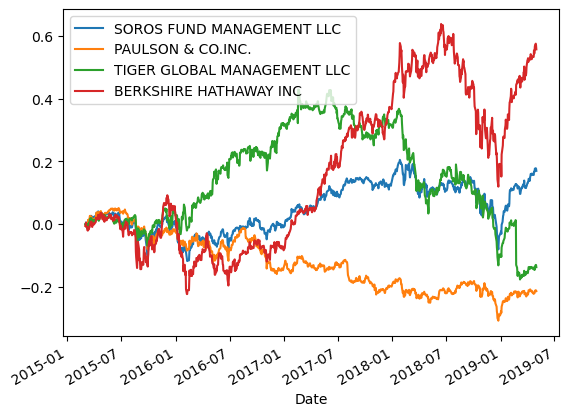

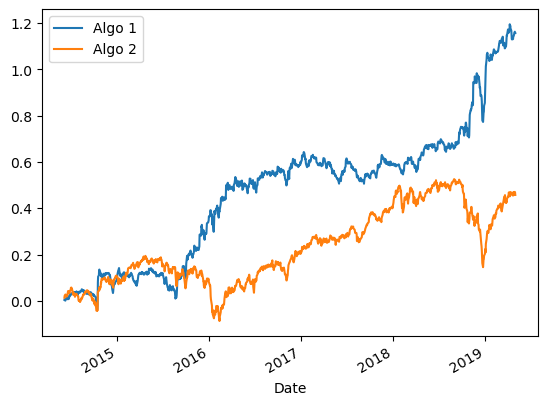

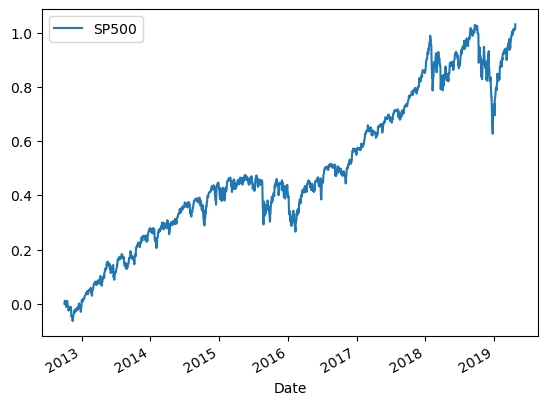

In [163]:
# Calculate cumulative returns of all portfolios
whales_cumulative_returns = (1 + whale_returns_df).cumprod() - 1
# Plot cumulative returns
whales_cumulative_returns.plot()

algo_cumulative_returns = (1 + algo_returns_df).cumprod() - 1
algo_cumulative_returns.plot()

sp500_cumulative_returns = (1 + sp500_dailyreturn_df).cumprod() - 1
sp500_cumulative_returns.plot()

In [164]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_return_21std_df = whale_returns_df.rolling(window=21).std()
algo_returns_std21_df = algo_returns_df.rolling(window=21).std()
sp500_dailyreturn_std21_df = sp500_dailyreturn_df.rolling(window=21).std()




<AxesSubplot:xlabel='Date'>

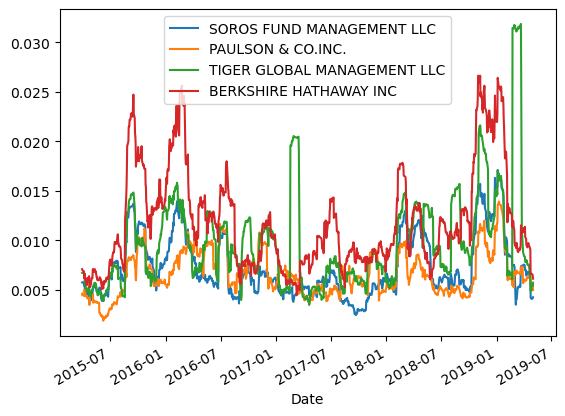

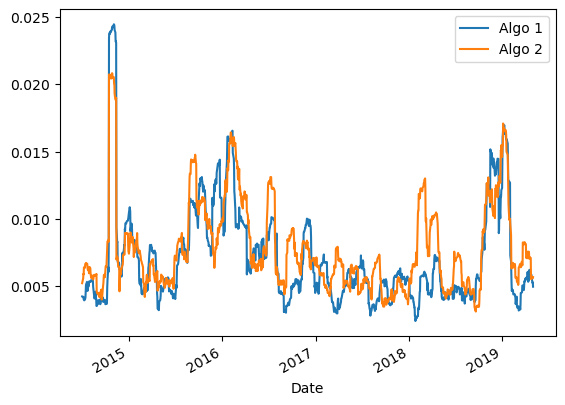

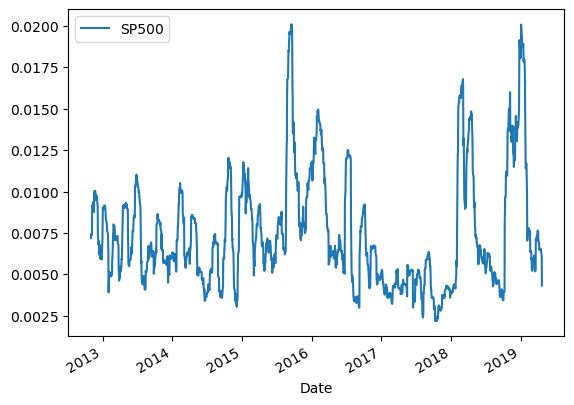

In [165]:
# Plot the rolling standard deviation

whale_return_21std_df.plot()
algo_returns_std21_df.plot()
sp500_dailyreturn_std21_df.plot()

### Calculate and plot the correlation

In [166]:
# Calculate the correlation
# combined_df = pd.concat([msft_df, sp500_df], axis="columns", join="inner")
# combined_df

whalesp_combined_df = pd.concat([whale_returns_df, sp500_dailyreturn_df], axis="columns", join="inner")
whalesp_combined_df
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944
...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579


In [167]:
algosp_combined_df = pd.concat([algo_returns_df, sp500_dailyreturn_df], axis="columns", join="inner")
algosp_combined_df

,Algo 1,Algo 2,SP500
Date,,,
2014-06-05,0.004062,0.013285,0.006525
2014-06-06,0.001857,0.008284,0.004628
2014-06-09,-0.005012,0.005668,0.000939
2014-06-10,0.004406,-0.000735,-0.000246
2014-06-11,0.004760,-0.003761,-0.003537
...,...,...,...
2019-04-16,-0.006945,0.002899,0.000509
2019-04-17,-0.010301,-0.005228,-0.002274
2019-04-18,-0.000588,-0.001229,0.001579


In [168]:
# Calculate the correlation of closing prices between MSFT and SP500
whale_price_correlation = whalesp_combined_df.corr()

# Calculate the correlation of closing prices between MSFT and SP500
algo_price_correlation = algosp_combined_df.corr()


<AxesSubplot:>

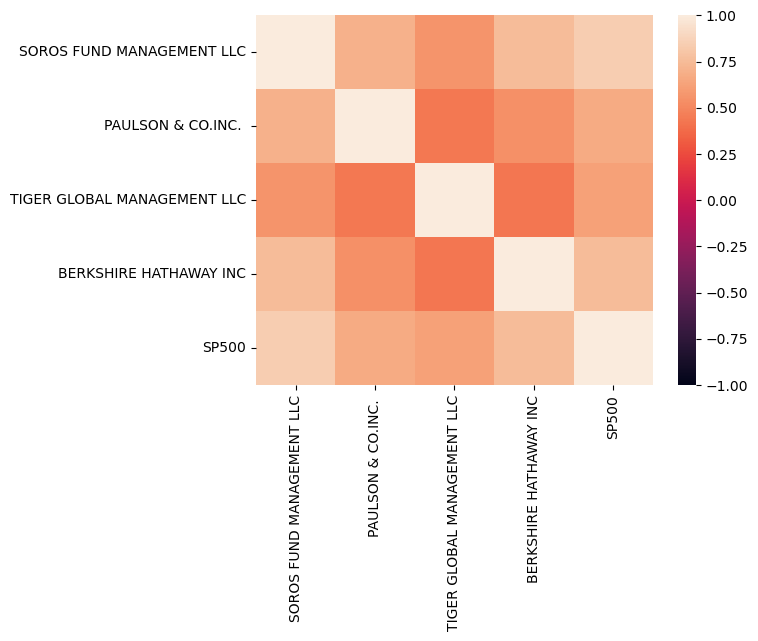

In [169]:

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(whale_price_correlation, vmin=-1, vmax=1)

<AxesSubplot:>

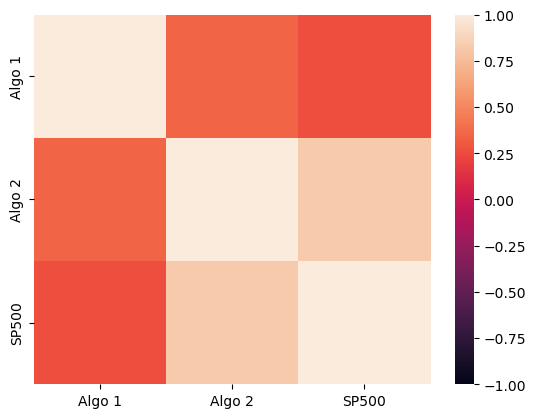

In [170]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(algo_price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [197]:
# Calculate covariance of a single portfolio

covariance = whalesp_combined_df["BERKSHIRE HATHAWAY INC"].cov(whalesp_combined_df['SP500'])
covariance


8.302834941861666e-05

In [198]:

# Calculate variance of S&P 500

sp500_variance = sp500_dailyreturn_df['SP500'].var()
sp500_variance


6.579270583158746e-05

In [199]:
# Computing beta
# Calculate beta of all daily returns of MSFT
whales_beta = covariance / sp500_variance
whales_beta

1.2619689123464242

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of BERKSHIRE Returns vs. S&P 500 Returns'}, xlabel='Date'>

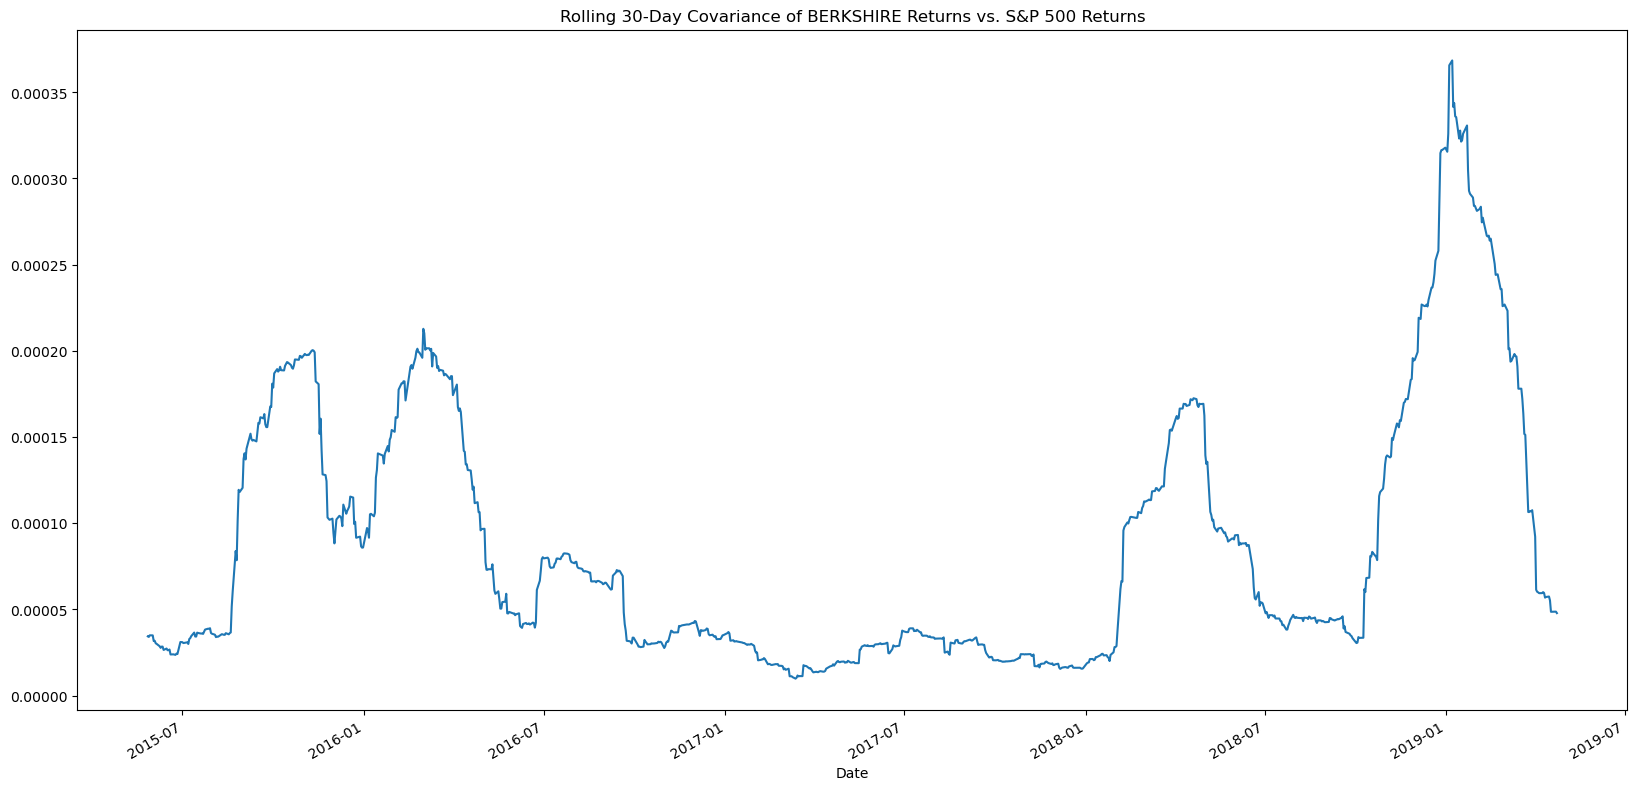

In [200]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
# rolling_covariance = daily_returns['MSFT'].rolling(window=30).cov(daily_returns['SP500'])
# rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns')

rolling_covariance = whalesp_combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whalesp_combined_df['SP500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of BERKSHIRE Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

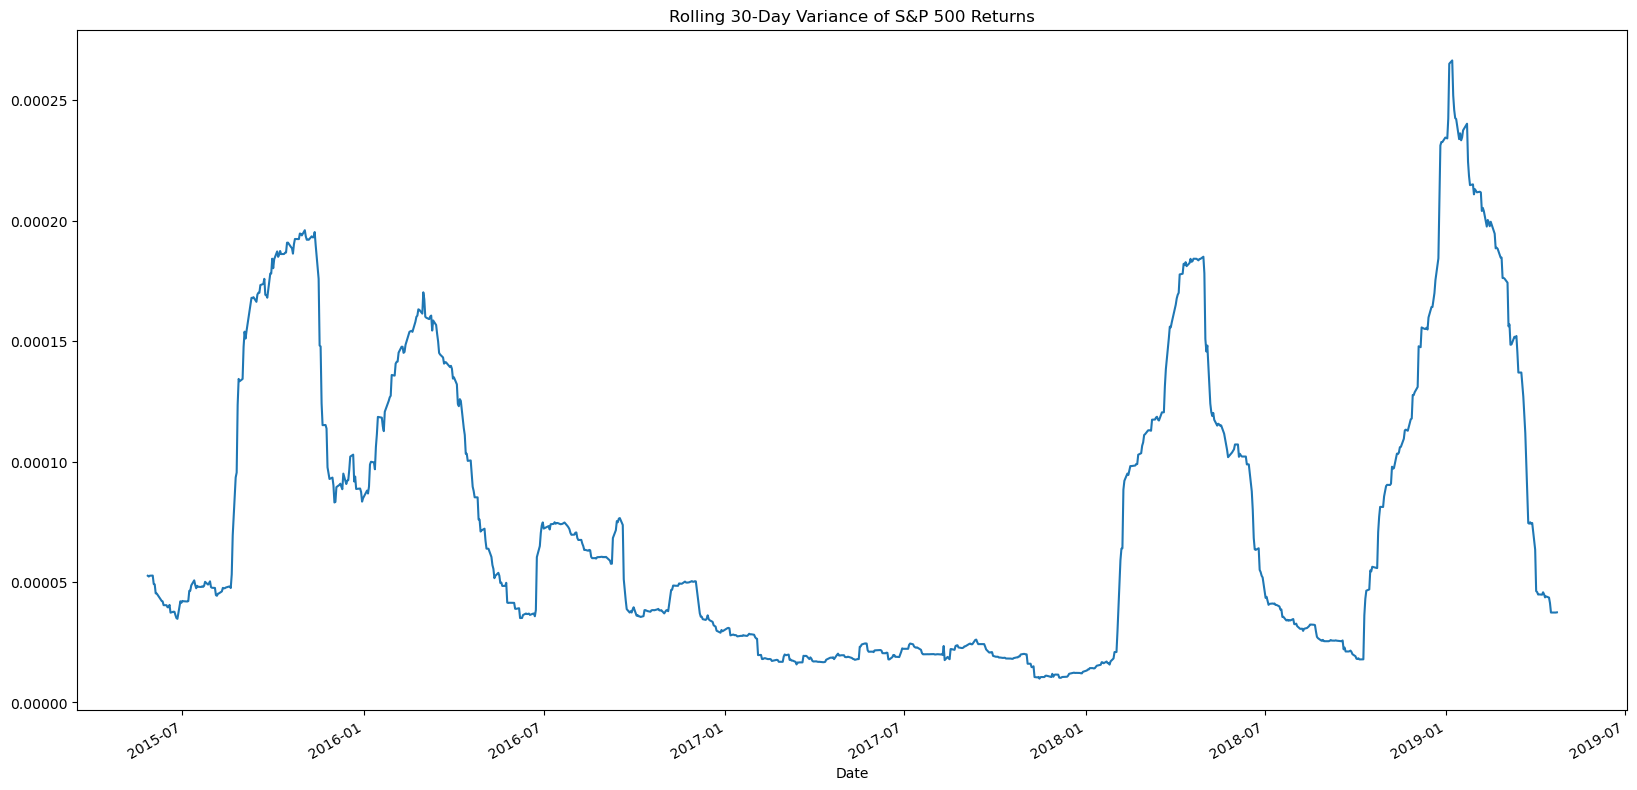

In [201]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
# rolling_variance = daily_returns['SP500'].rolling(window=30).var()
# rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

rolling_variance = whalesp_combined_df['SP500'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of BERKSHIRE'}, xlabel='Date'>

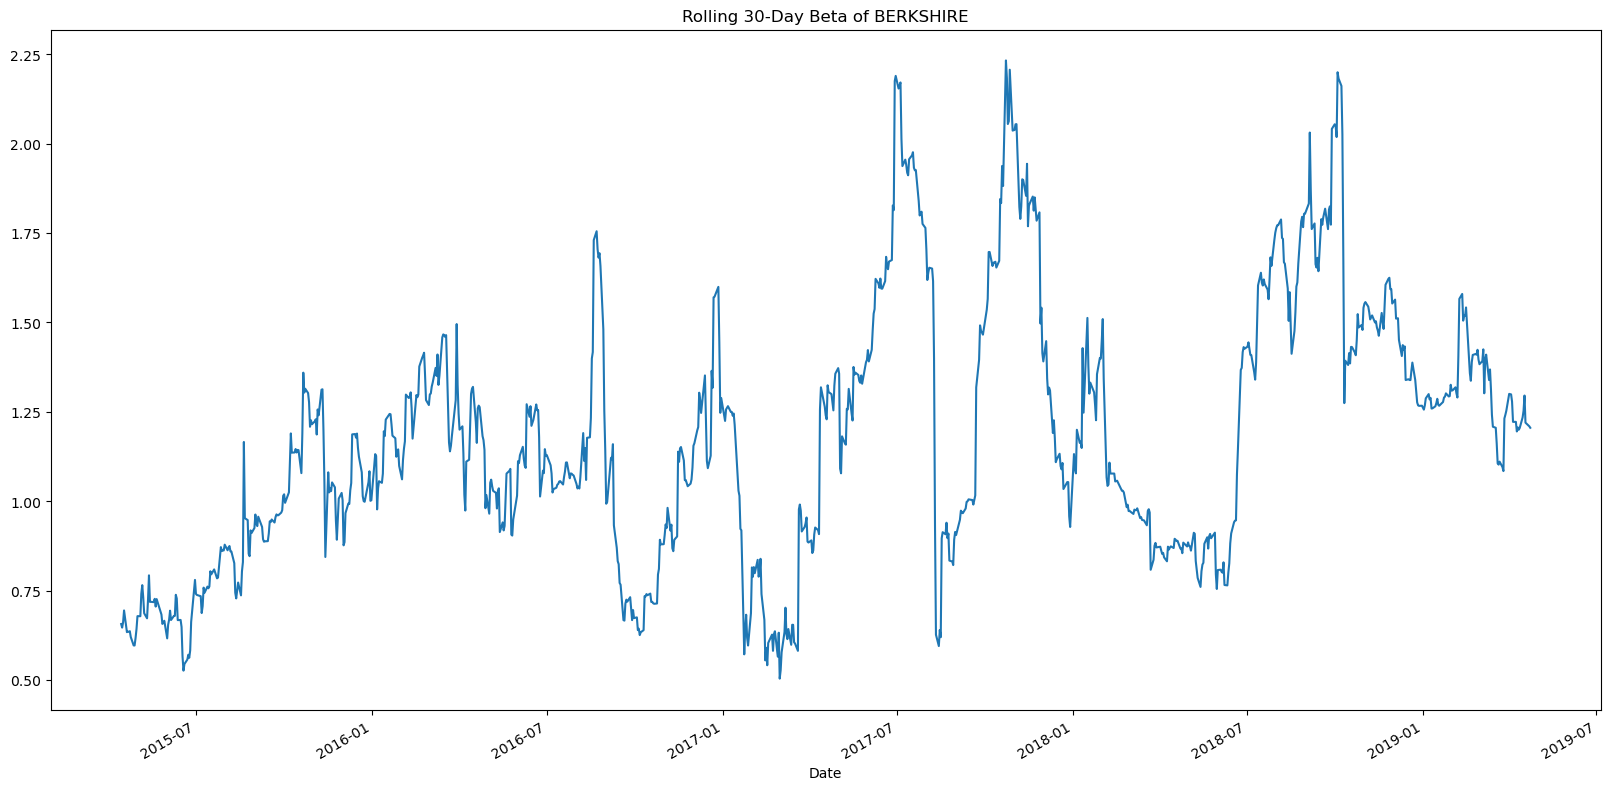

In [191]:
# Calculate 30-day rolling beta of MSFT and plot the data
# rolling_beta = rolling_covariance / rolling_variance
# rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of MSFT')

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

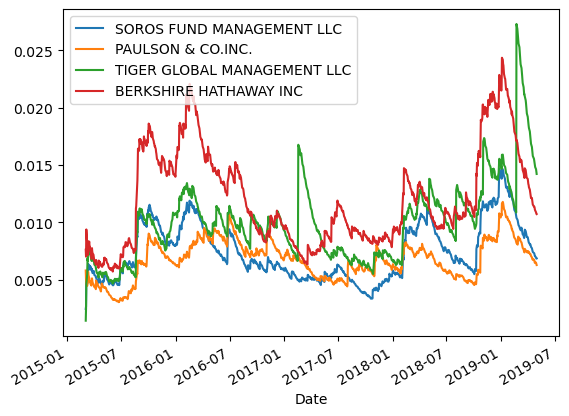

In [ ]:
# Use `ewm` to calculate the rolling window

whales_ewm = whale_returns_df.ewm(halflife=21).std().plot()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = ((column_appended_data.mean()-column_appended_data['SP500'].mean()) * 252) / (column_appended_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
SP500                          0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

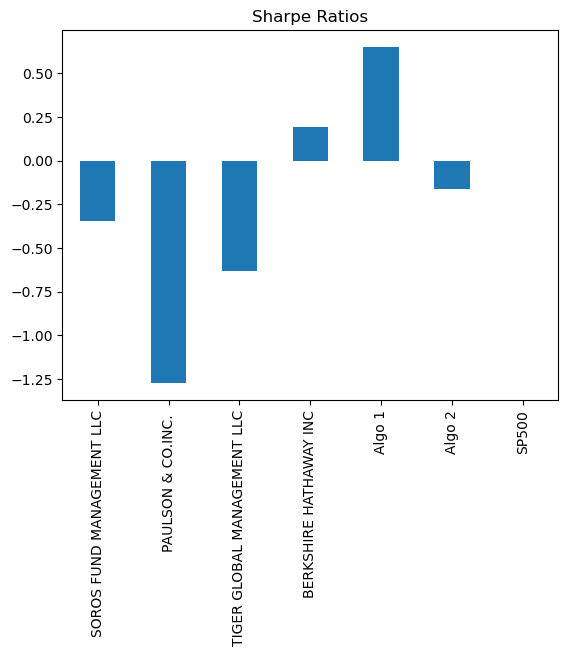

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

From the previous analysis we can see that the some of the stocks in the whales portfolio performed reasonably well, they being the Soros Fund and the Berkshire Hathaway stock. The most consistent performer was Algo 1 in the Algo portpfolio. While the Soros and Berkshire stocks mirrored the S&P 500 during the downturn in 2018, the Algo 1 was able to sustain growth with a minimal dip. This is clearly seen in the comparison of Sharpe ratios where Algo 1 clearly outperforms all other stocks. The worst performer is Paulson & CO stock.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [203]:
# Reading whale returns
google_returns_path = Path("../Resources/google.csv")
google_returns_df = pd.read_csv(google_returns_path)
google_returns_df.head()



,Date,Close
0,04/01/2021 16:00:00,86.41
1,05/01/2021 16:00:00,87.05
2,06/01/2021 16:00:00,86.76
3,07/01/2021 16:00:00,89.36
4,08/01/2021 16:00:00,90.36


In [205]:
# Reading data from 2nd stock
amazon_returns_path = Path("../Resources/amazon.csv")
amazon_returns_df = pd.read_csv(amazon_returns_path)
amazon_returns_df.head()

,Date,Close
0,04/01/2021 16:00:00,159.33
1,05/01/2021 16:00:00,160.93
2,06/01/2021 16:00:00,156.92
3,07/01/2021 16:00:00,158.11
4,08/01/2021 16:00:00,159.14


In [ ]:
# Reading data from 3rd stock
cisco_returns_path = Path("../Resources/cisco.csv")
cisco_returns_df = pd.read_csv(cisco_returns_path)
cisco_returns_df.head()

In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!